<a href="https://colab.research.google.com/github/LondheShubham153/unsupervised_learning/blob/main/k_means_cluster_raw_implementation_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. K-Means (Raw Implementation)

# Load libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('data.csv')
df.head(2)

,x,y
0,12,39
1,20,36


# Define Random Centroids

In [ ]:
# centroids_1 = {1: [25, 45], 2: [50, 65], 3: [65, 15]}
centroids_1 = {1: [10, 10], 2: [30, 30], 3: [50, 50]} # One centroid disappears

# Plot Observations and Centroids

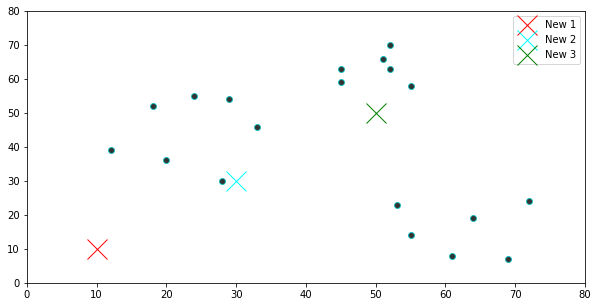

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df['x'], df['y'], c='black', alpha=0.8, edgecolor='c')

plt.plot(centroids_1[1][0], centroids_1[1][1], 'x', markersize=20, color='red', label='New 1')  
plt.plot(centroids_1[2][0], centroids_1[2][1], 'x', markersize=20, color='cyan', label='New 2')  
plt.plot(centroids_1[3][0], centroids_1[3][1], 'x', markersize=20, color='green', label='New 3')  

plt.legend()
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# Calculate Distance from Centroids

In [ ]:
def distance_from_centroids(df, centroids):
            
    df['euclidean_distance_from_1'] = np.sqrt(
                                        (df['x'] - centroids[1][0]) ** 2
                                        + (df['y'] - centroids[1][1]) ** 2
                                        )

    df['euclidean_distance_from_2'] = np.sqrt(
                                        (df['x'] - centroids[2][0]) ** 2
                                        + (df['y'] - centroids[2][1]) ** 2
                                        )
    df['euclidean_distance_from_3'] = np.sqrt(
                                        (df['x'] - centroids[3][0]) ** 2
                                        + (df['y'] - centroids[3][1]) ** 2
                                        )
    return df

df = distance_from_centroids(df, centroids_1)
df.head(2)

,x,y,euclidean_distance_from_1,euclidean_distance_from_2,euclidean_distance_from_3
0,12,39,29.068884,20.124612,39.560081
1,20,36,27.856777,11.661904,33.105891


# Tag Observations to Nearest Centroid

In [ ]:
def tag_to_centroid(df):
    
    df['closest'] = df[['euclidean_distance_from_1', 'euclidean_distance_from_2', 'euclidean_distance_from_3']].idxmin(axis="columns")
    df['closest'] = df['closest'].str.lstrip('euclidean_distance_from_')
    
tag_to_centroid(df)
df.head(2)

,x,y,euclidean_distance_from_1,euclidean_distance_from_2,euclidean_distance_from_3,closest
0,12,39,29.068884,20.124612,39.560081,2
1,20,36,27.856777,11.661904,33.105891,2


In [ ]:
df['closest'] = pd.to_numeric(df['closest'])
df.head(10)

,x,y,euclidean_distance_from_1,euclidean_distance_from_2,euclidean_distance_from_3,closest
0,12,39,29.068884,20.124612,39.560081,2
1,20,36,27.856777,11.661904,33.105891,2
2,28,30,26.907248,2.000000,29.732137,2
3,18,52,42.755117,25.059928,32.062439,2
4,29,54,47.927028,24.020824,21.377558,3
5,33,46,42.720019,16.278821,17.464249,2
6,24,55,47.127487,25.709920,26.476405,2
7,45,59,60.216277,32.649655,10.295630,3
8,45,63,63.513778,36.249138,13.928388,3
9,52,70,73.239334,45.650849,20.099751,3


# Plot Tagged Observations

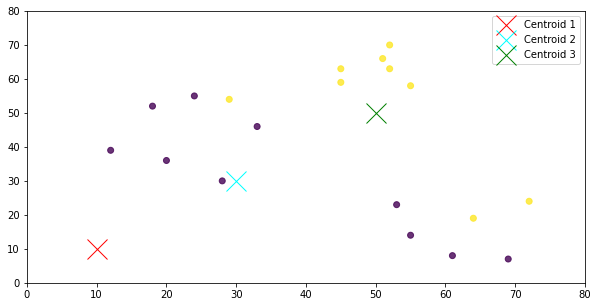

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df['x'], df['y'], c=df['closest'], alpha=0.8)

plt.plot(centroids_1[1][0], centroids_1[1][1], 'x', markersize=20, color='red', label='Centroid 1')  
plt.plot(centroids_1[2][0], centroids_1[2][1], 'x', markersize=20, color='cyan', label='Centroid 2')  
plt.plot(centroids_1[3][0], centroids_1[3][1], 'x', markersize=20, color='green', label='Centroid 3')  

plt.legend()
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# Calculate New Centroids

In [ ]:
import copy

old_centroids = copy.deepcopy(centroids_1)

def update(k):
    for i in k.keys():
        k[i][0] = np.mean(df[df['closest'] == i]['x'])
        k[i][1] = np.mean(df[df['closest'] == i]['y'])
        
    return k

In [ ]:
centroids_2 = update(old_centroids)
print('New Centroids:', centroids_2)
print('Old Centroids:', centroids_1)

New Centroids: {1: [nan, nan], 2: [37.3, 31.0], 3: [51.666666666666664, 52.888888888888886]}
Old Centroids: {1: [10, 10], 2: [30, 30], 3: [50, 50]}


# Plot New Centroids and Tagged Observations

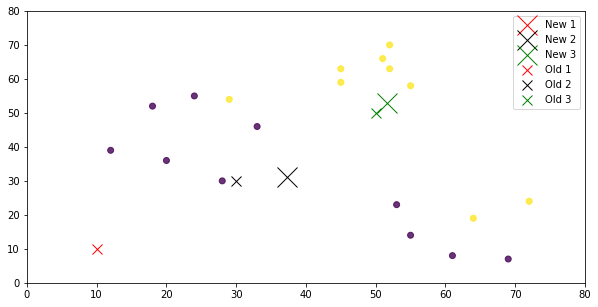

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df['x'], df['y'], c=df['closest'], alpha=0.8)

plt.plot(centroids_2[1][0], centroids_2[1][1], 'x', markersize=20, color='red', label='New 1')  
plt.plot(centroids_2[2][0], centroids_2[2][1], 'x', markersize=20, color='black', label='New 2')  
plt.plot(centroids_2[3][0], centroids_2[3][1], 'x', markersize=20, color='green', label='New 3')  

plt.plot(centroids_1[1][0], centroids_1[1][1], 'x', markersize=10, color='red', label='Old 1')  
plt.plot(centroids_1[2][0], centroids_1[2][1], 'x', markersize=10, color='black', label='Old 2')  
plt.plot(centroids_1[3][0], centroids_1[3][1], 'x', markersize=10, color='green', label='Old 3')  

plt.legend()
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# Calculate Distance from Centroids

In [ ]:
df = distance_from_centroids(df, centroids_2)
df.head(10)

,x,y,euclidean_distance_from_1,euclidean_distance_from_2,euclidean_distance_from_3,closest
0,12,39,NaN,26.534694,42.027915,2
1,20,36,NaN,18.008054,35.888889,2
2,28,30,NaN,9.353609,32.924343,2
3,18,52,NaN,28.521746,33.678399,2
4,29,54,NaN,24.451789,22.693883,3
5,33,46,NaN,15.604166,19.897267,2
6,24,55,NaN,27.438841,27.747094,2
7,45,59,NaN,29.039456,9.043789,3
8,45,63,NaN,32.913371,12.111111,3
9,52,70,NaN,41.678412,17.114358,3


# Tag Observations to Nearest Centroid

In [ ]:
tag_to_centroid(df)
df.head(10)

,x,y,euclidean_distance_from_1,euclidean_distance_from_2,euclidean_distance_from_3,closest
0,12,39,NaN,26.534694,42.027915,2
1,20,36,NaN,18.008054,35.888889,2
2,28,30,NaN,9.353609,32.924343,2
3,18,52,NaN,28.521746,33.678399,2
4,29,54,NaN,24.451789,22.693883,3
5,33,46,NaN,15.604166,19.897267,2
6,24,55,NaN,27.438841,27.747094,2
7,45,59,NaN,29.039456,9.043789,3
8,45,63,NaN,32.913371,12.111111,3
9,52,70,NaN,41.678412,17.114358,3


In [ ]:
df['closest'] = pd.to_numeric(df['closest'])
df.head(10)

,x,y,euclidean_distance_from_1,euclidean_distance_from_2,euclidean_distance_from_3,closest
0,12,39,NaN,26.534694,42.027915,2
1,20,36,NaN,18.008054,35.888889,2
2,28,30,NaN,9.353609,32.924343,2
3,18,52,NaN,28.521746,33.678399,2
4,29,54,NaN,24.451789,22.693883,3
5,33,46,NaN,15.604166,19.897267,2
6,24,55,NaN,27.438841,27.747094,2
7,45,59,NaN,29.039456,9.043789,3
8,45,63,NaN,32.913371,12.111111,3
9,52,70,NaN,41.678412,17.114358,3


# Plot Tagged Observations

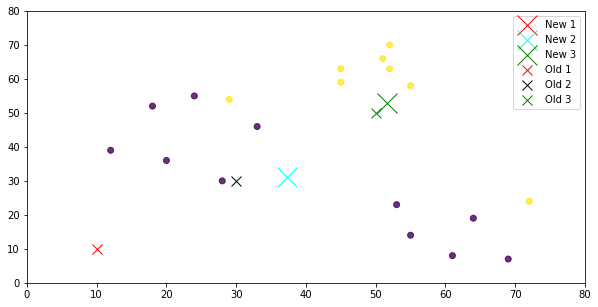

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df['x'], df['y'], c=df['closest'], alpha=0.8)

plt.plot(centroids_2[1][0], centroids_2[1][1], 'x', markersize=20, color='red', label='New 1')  
plt.plot(centroids_2[2][0], centroids_2[2][1], 'x', markersize=20, color='cyan', label='New 2')  
plt.plot(centroids_2[3][0], centroids_2[3][1], 'x', markersize=20, color='green', label='New 3')

plt.plot(centroids_1[1][0], centroids_1[1][1], 'x', markersize=10, color='red', label='Old 1')  
plt.plot(centroids_1[2][0], centroids_1[2][1], 'x', markersize=10, color='black', label='Old 2')  
plt.plot(centroids_1[3][0], centroids_1[3][1], 'x', markersize=10, color='green', label='Old 3')  

plt.legend()
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# Calculate New Centroids

In [ ]:
import copy

old_centroids = copy.deepcopy(centroids_2)

def update(k):
    for i in k.keys():
        k[i][0] = np.mean(df[df['closest'] == i]['x'])
        k[i][1] = np.mean(df[df['closest'] == i]['y'])
        
    return k

In [ ]:
centroids_3 = update(old_centroids)
print('New Centroids:', centroids_3)
print('Old Centroids:', centroids_2)

New Centroids: {1: [nan, nan], 2: [39.72727272727273, 29.90909090909091], 3: [50.125, 57.125]}
Old Centroids: {1: [nan, nan], 2: [37.3, 31.0], 3: [51.666666666666664, 52.888888888888886]}


# Plot New Centroids and Tagged Observations

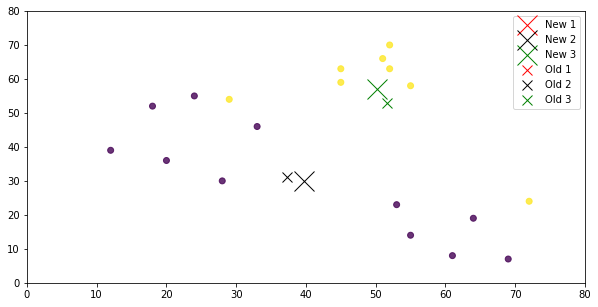

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df['x'], df['y'], c=df['closest'], alpha=0.8)

plt.plot(centroids_3[1][0], centroids_3[1][1], 'x', markersize=20, color='red', label='New 1')  
plt.plot(centroids_3[2][0], centroids_3[2][1], 'x', markersize=20, color='black', label='New 2')  
plt.plot(centroids_3[3][0], centroids_3[3][1], 'x', markersize=20, color='green', label='New 3')  

plt.plot(centroids_2[1][0], centroids_2[1][1], 'x', markersize=10, color='red', label='Old 1')  
plt.plot(centroids_2[2][0], centroids_2[2][1], 'x', markersize=10, color='black', label='Old 2')  
plt.plot(centroids_2[3][0], centroids_2[3][1], 'x', markersize=10, color='green', label='Old 3')  

plt.legend()
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# 2. Implementing K-Means using Sklearn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('data.csv')
df.head(2)

,x,y
0,12,39
1,20,36


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [ ]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[50.        , 63.16666667],
       [62.33333333, 15.83333333],
       [23.42857143, 44.57142857]])

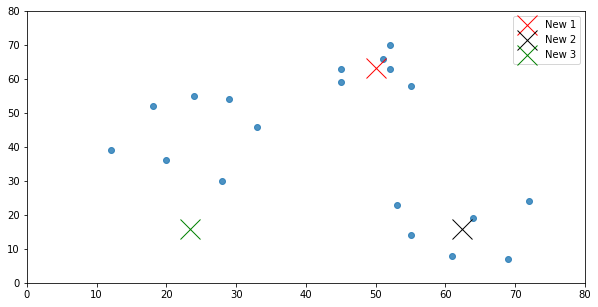

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df['x'], df['y'], alpha=0.8)

plt.plot(centroids[0][0], centroids[0][1], 'x', markersize=20, color='red', label='New 1')  
plt.plot(centroids[1][0], centroids[1][1], 'x', markersize=20, color='black', label='New 2')  
plt.plot(centroids[2][0], centroids_2[3][1], 'x', markersize=20, color='green', label='New 3')  

plt.legend()
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [ ]:
# From Raw Implementation
centroids_3

{1: [23.428571428571427, 44.57142857142857],
 2: [50.0, 63.166666666666664],
 3: [62.333333333333336, 15.833333333333334]}

In [ ]:
# From sklearn
centroids

array([[50.        , 63.16666667],
       [62.33333333, 15.83333333],
       [23.42857143, 44.57142857]])